# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import sys
from pathlib import Path

path = Path(os.path.dirname(os.getcwd()))
path = str(path)
print(path)
sys.path.insert(1, path)

/Users/saideepbunny/Projects/Application_Ranking_System


## Reading the data

In [3]:
df1 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_skills.csv")
df2 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/job_summary.csv")
df3 = pd.read_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/linkedin_job_postings.csv")
df3

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite
1348450,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite
1348451,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite
1348452,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite


In [4]:
df = df3.merge(df1, on='job_link', how='inner').merge(df2, on='job_link', how='inner')
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur...",Employment Type:\nFull time\nShift:\n12 Hour N...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c...",TravelNurseSource is working with Adelphi Medi...
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est...",Want to learn more about this role and Jobot? ...
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o...",NEXDINE HOSPITALITY one of the nation's fastes...
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse...",TravelNurseSource is working with Alliant Pers...


In [5]:
df['id'] = list(range(df.shape[0]))
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,id
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...,0
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...,1
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...,2
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...,3
4,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 08:08:19.663033+00,t,t,f,Registered Nurse (RN),Trinity Health MI,"Muskegon, MI",2024-01-14,Muskegon,United States,Nurse Practitioner,Mid senior,Onsite,"Nursing, BSN, Medical License, Virtual RN, Nur...",Employment Type:\nFull time\nShift:\n12 Hour N...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296376,https://www.linkedin.com/jobs/view/registered-...,2024-01-20 15:21:07.786118+00,t,t,f,Registered Nurse (RN) #CP-RN-7998660 - 2411627...,TravelNurseSource,"Providence, RI",2024-01-14,Fall River,United States,Nurse Supervisor,Mid senior,Onsite,"Registered Nurse, BLS certification, Nursing c...",TravelNurseSource is working with Adelphi Medi...,1296376
1296377,https://www.linkedin.com/jobs/view/constructio...,2024-01-20 15:21:10.885264+00,t,t,f,Construction Superintendent,Jobot,"New Iberia, LA",2024-01-15,Lafayette,United States,Assistant Construction Superintendent,Mid senior,Onsite,"Construction management, Project planning, Est...",Want to learn more about this role and Jobot? ...,1296377
1296378,https://www.linkedin.com/jobs/view/executive-c...,2024-01-21 07:40:00.304641+00,t,t,f,"Executive Chef, Operations Support",NEXDINE Hospitality,"Riverhead, NY",2024-01-14,Eastport,United States,Chef,Mid senior,Onsite,"Culinary, Chef Director, Menu writing, Cycle o...",NEXDINE HOSPITALITY one of the nation's fastes...,1296378
1296379,https://www.linkedin.com/jobs/view/rn-register...,2024-01-21 00:38:39.816821+00,t,t,f,"RN- Registered Nurse, Analyst - - 23934913EXPP...",TravelNurseSource,"Aurora, CO",2024-01-16,Colorado,United States,Occupational Analyst,Mid senior,Onsite,"Registered Nurse, Analyst, RN Registered Nurse...",TravelNurseSource is working with Alliant Pers...,1296379


In [6]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 1296381
Number of columns in the dataset: 17


### Overview of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1296381 non-null  object
 1   last_processed_time  1296381 non-null  object
 2   got_summary          1296381 non-null  object
 3   got_ner              1296381 non-null  object
 4   is_being_worked      1296381 non-null  object
 5   job_title            1296381 non-null  object
 6   company              1296372 non-null  object
 7   job_location         1296362 non-null  object
 8   first_seen           1296381 non-null  object
 9   search_city          1296381 non-null  object
 10  search_country       1296381 non-null  object
 11  search_position      1296381 non-null  object
 12  job_level            1296381 non-null  object
 13  job_type             1296381 non-null  object
 14  job_skills           1294296 non-null  object
 15  job_summary    

### Null value report

In [8]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [9]:
null_value_report(df)

,column,Count,Percentage
0,job_link,0,0.000000
1,last_processed_time,0,0.000000
2,got_summary,0,0.000000
3,got_ner,0,0.000000
4,is_being_worked,0,0.000000
5,job_title,0,0.000000
6,company,9,0.000694
7,job_location,19,0.001466
8,first_seen,0,0.000000
9,search_city,0,0.000000


## Categorizing columns

In [10]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [11]:
# get_cardinality(df)

In [12]:
ignore_columns = ["job_link", "last_processed_time", "got_summary", "got_ner", "is_being_worked", "id"]
numerical_columns = []

categorical_columns = ["job_title", "company", "job_location", "first_seen", "search_city", "search_country", "search_position", "job_level", "job_type"]
text_columns = ["job_skills", "job_summary"]

In [13]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [14]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 0
Number of Categorical columns: 9
Number of Text columns: 2


## EDA

### Numerical columns

In [15]:
#There are no numerical fields

#### Histograms

In [16]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

### Categorical columns

#### Null value report

In [17]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,job_title,0,0.000000
1,company,9,0.000694
2,job_location,19,0.001466
3,first_seen,0,0.000000
4,search_city,0,0.000000
5,search_country,0,0.000000
6,search_position,0,0.000000
7,job_level,0,0.000000
8,job_type,0,0.000000


#### Statistics

In [18]:
df[categorical_columns].describe(include=['object'])

,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1296381,1296372,1296362,1296381,1296381,1296381,1296381,1296381,1296381
unique,565695,88995,28791,6,1018,4,1923,2,3
top,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,North Carolina,United States,Account Executive,Mid senior,Onsite
freq,7315,40049,12580,459354,9495,1105410,19465,1155276,1285565


#### Count plots

In [19]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


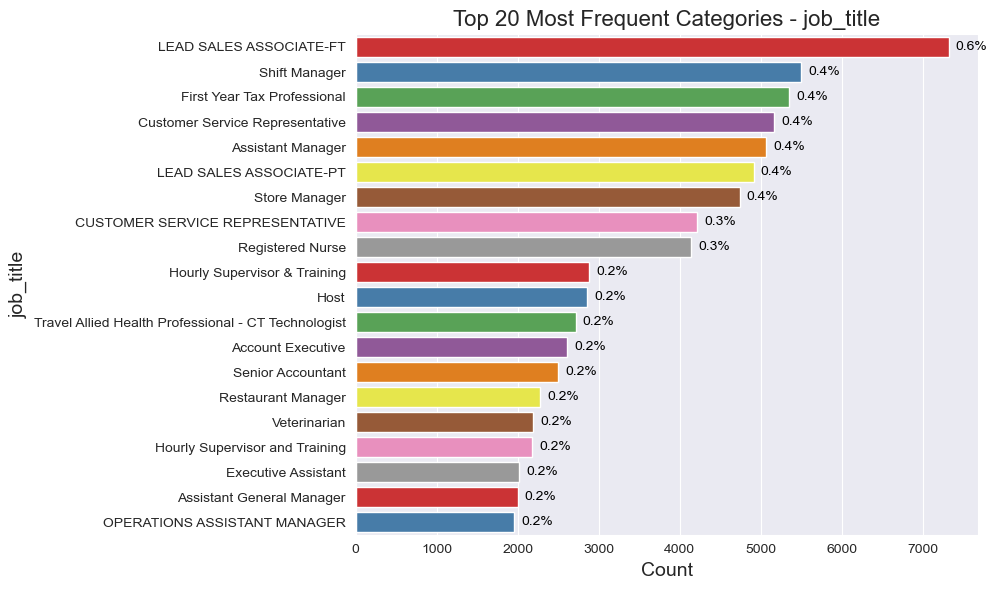

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


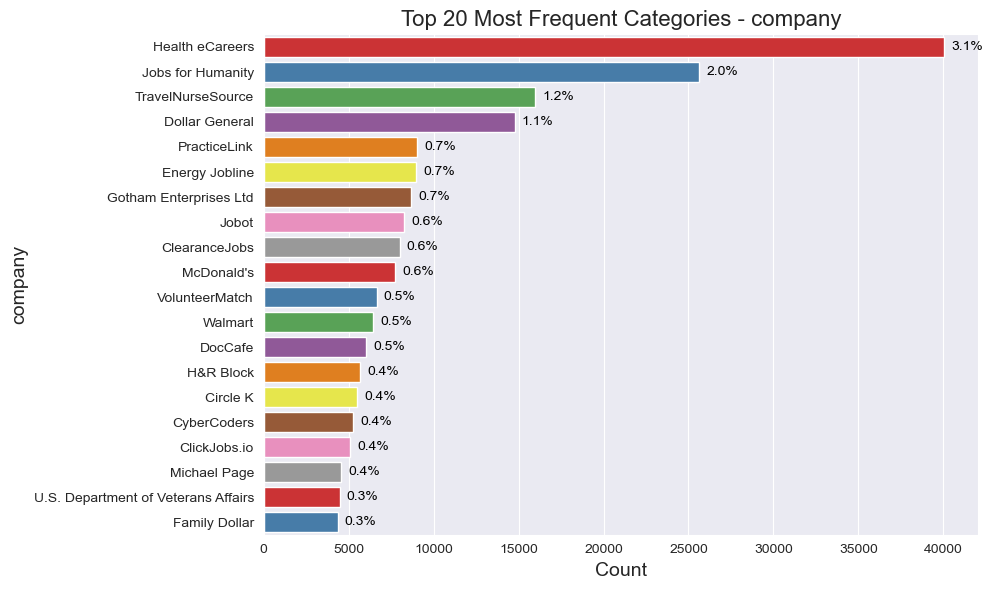

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


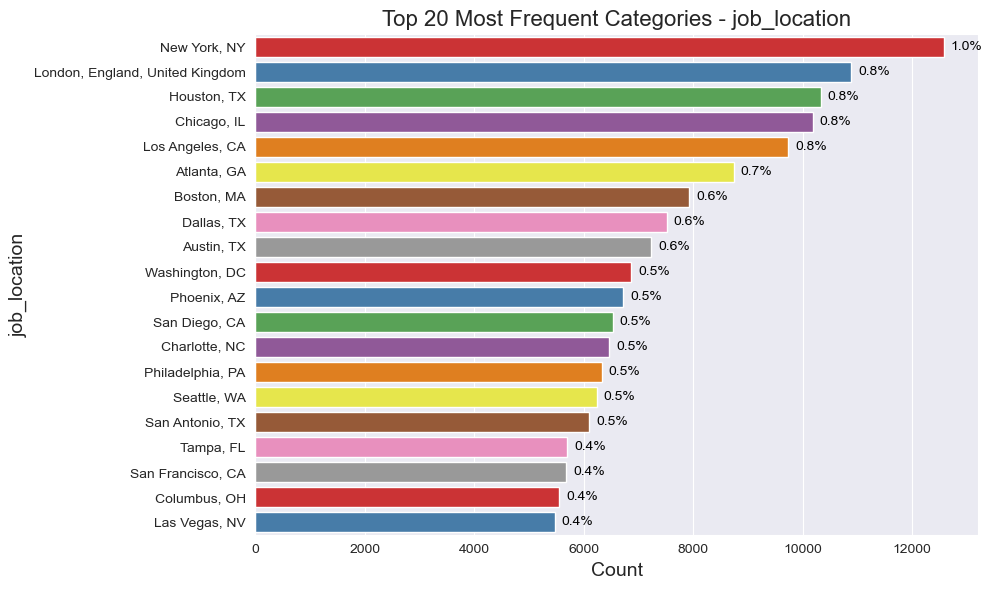

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


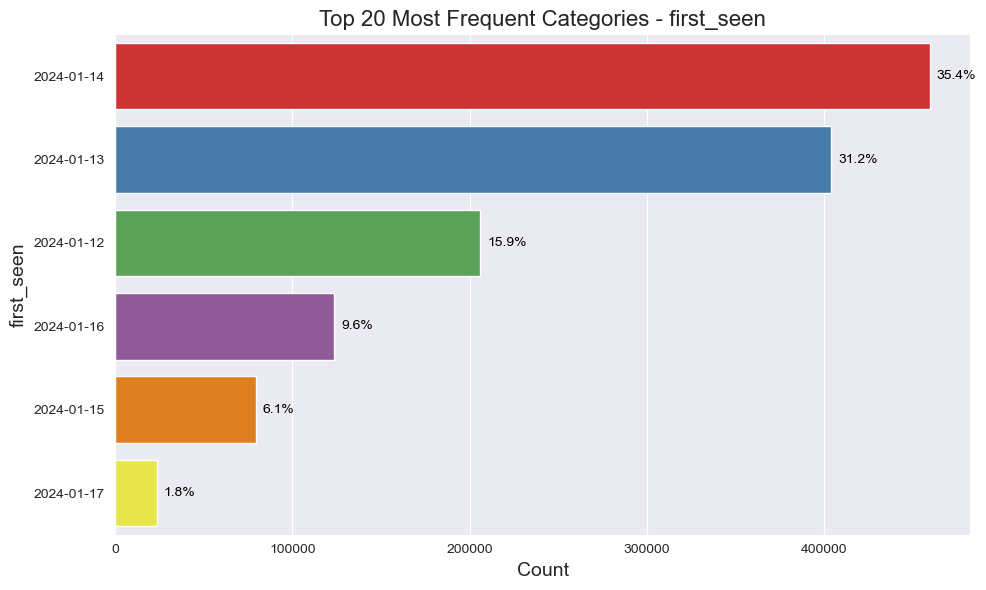

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


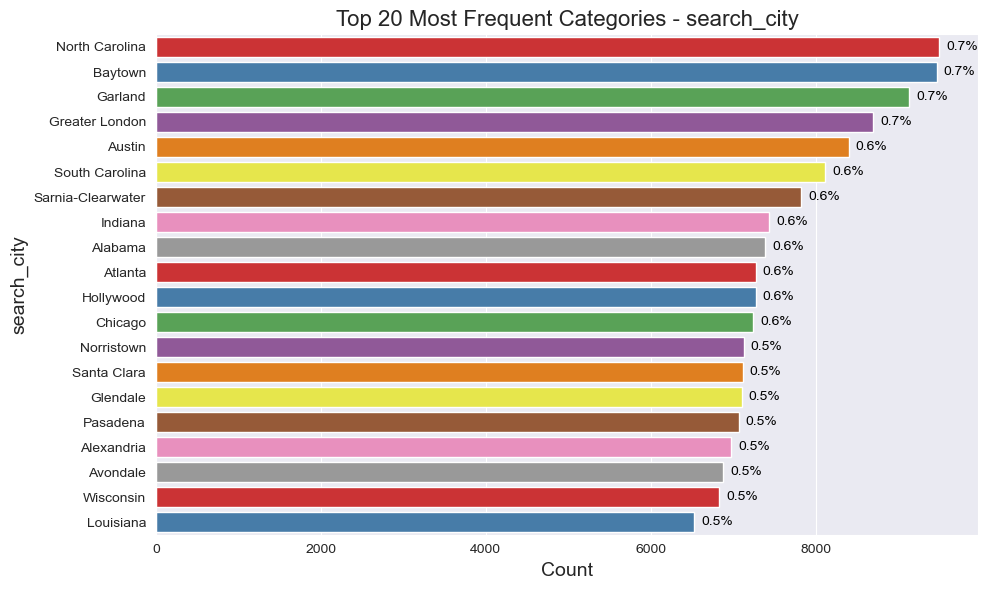

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


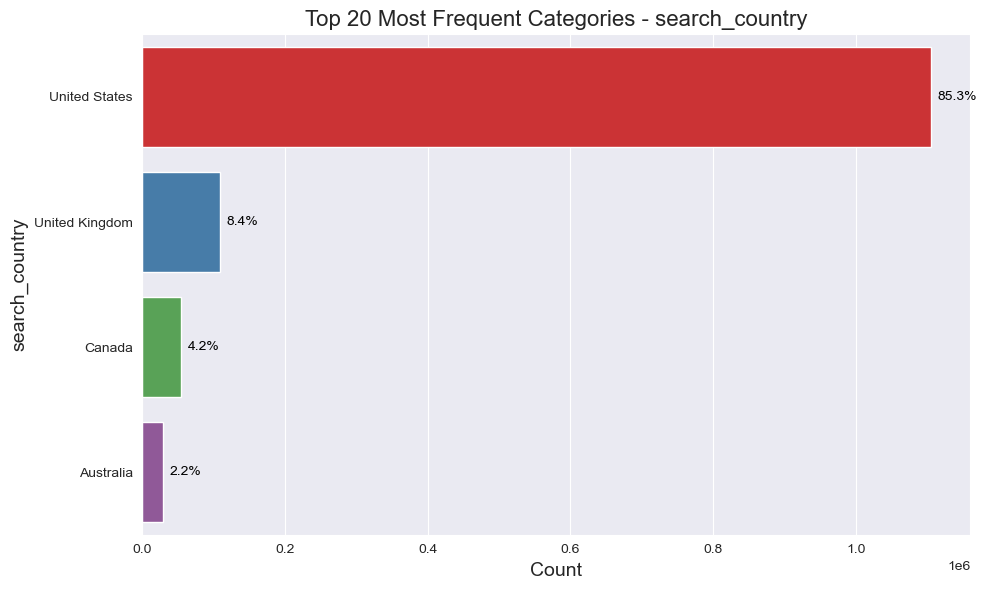

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


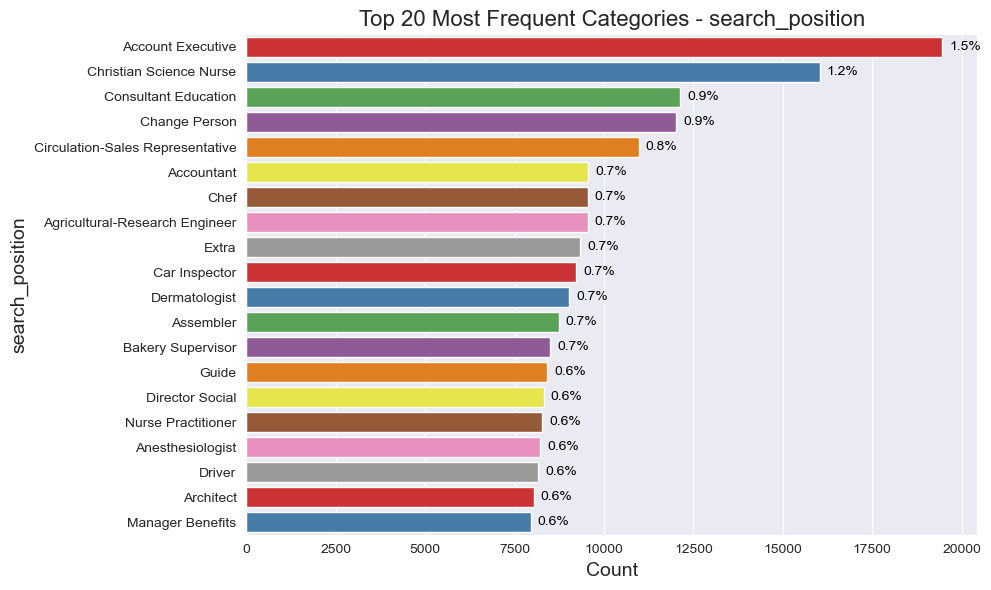

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


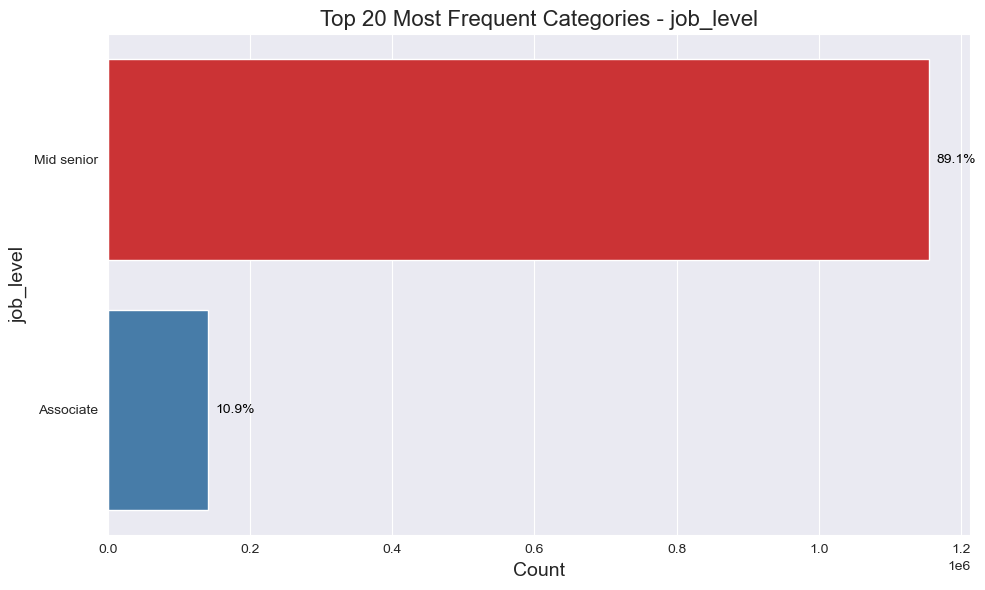

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


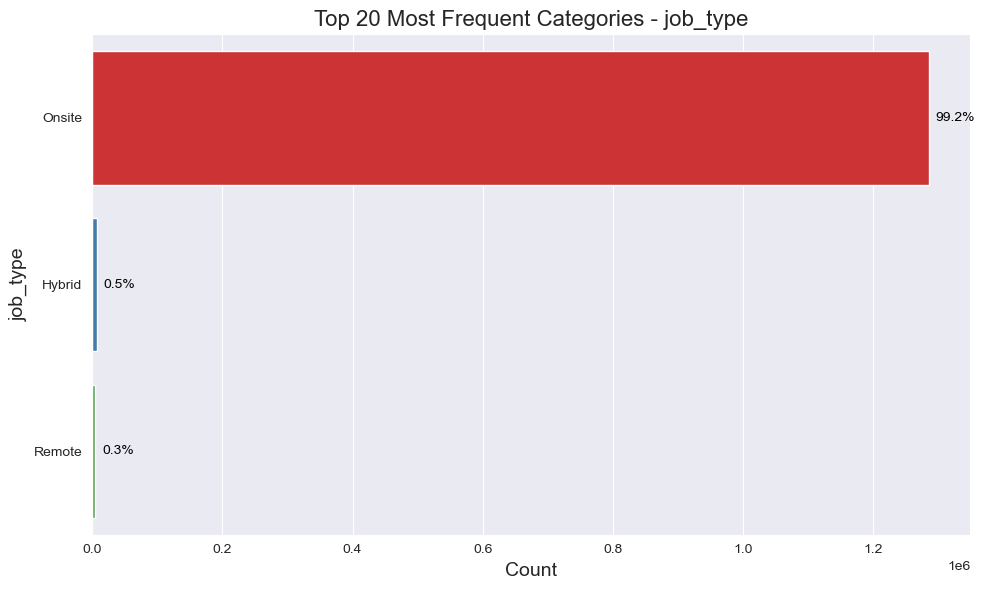

In [20]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [21]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,2085,0.160832
1,job_summary,0,0.000000


#### Text lengths

In [22]:
temp = df[text_columns].fillna("").copy()
for i in text_columns:
    temp[f"{i}_len"] = temp[i].apply(lambda x: len(x))
    
temp[text_columns + [f"{i}_len" for i in text_columns]]

,job_skills,job_summary,job_skills_len,job_summary_len
0,"Medical equipment sales, Key competitors, Term...",Responsibilities\nJob Description Summary\nJob...,441,4602
1,"Nursing, Bachelor of Science in Nursing, Maste...",Employment Type:\nFull time\nShift:\nDescripti...,431,2950
2,"Restaurant Operations Management, Inventory Ma...",Job Details\nDescription\nWhat You'll Do\nAs a...,1155,4571
3,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...,305,3944
4,"Nursing, BSN, Medical License, Virtual RN, Nur...",Employment Type:\nFull time\nShift:\n12 Hour N...,116,1762
...,...,...,...,...
1296376,"Registered Nurse, BLS certification, Nursing c...",TravelNurseSource is working with Adelphi Medi...,280,2224
1296377,"Construction management, Project planning, Est...",Want to learn more about this role and Jobot? ...,297,2813
1296378,"Culinary, Chef Director, Menu writing, Cycle o...",NEXDINE HOSPITALITY one of the nation's fastes...,757,4856
1296379,"Registered Nurse, Analyst, RN Registered Nurse...",TravelNurseSource is working with Alliant Pers...,357,2143


In [23]:
temp["num_of_skills"] = temp["job_skills"].apply(lambda x: len(x.split(",")))

#### Text length statistics

In [24]:
temp[[f"{i}_len" for i in text_columns] + ["num_of_skills"]].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,job_skills_len,job_summary_len,num_of_skills
count,1296381.00,1296381.00,1296381.00
mean,413.73,3818.55,20.77
std,269.08,2302.56,11.65
min,0.00,21.00,1.00
5%,123.00,1028.00,7.00
25%,245.00,2211.00,13.00
50%,357.00,3382.00,19.00
75%,511.00,4927.00,25.00
95%,886.00,7958.00,41.00
max,9939.00,23748.00,463.00


#### Text length histograms

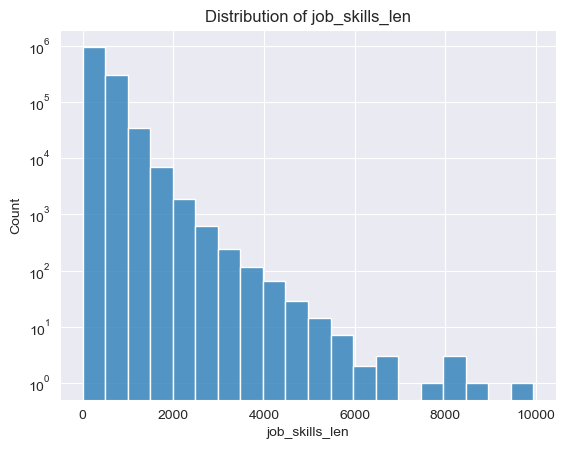

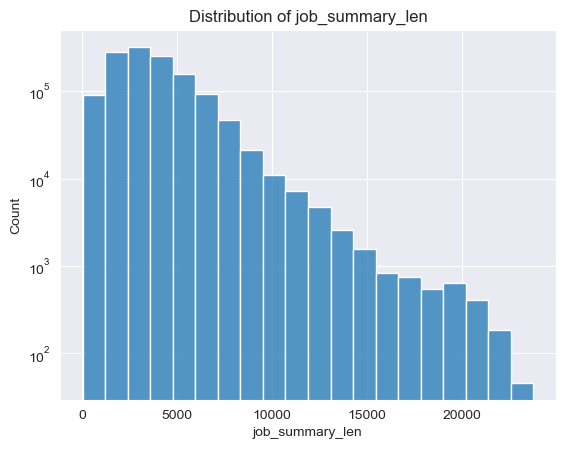

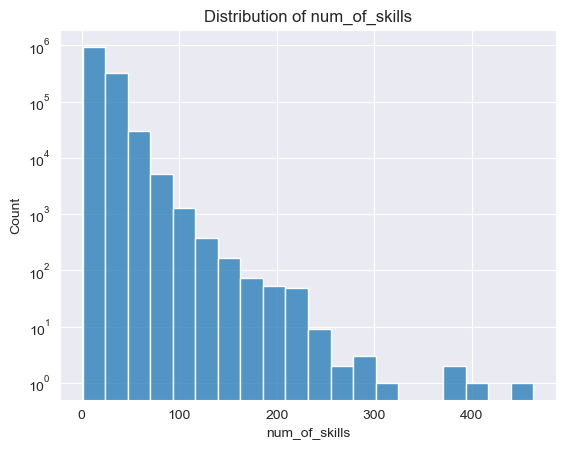

In [25]:
for i in [f"{i}_len" for i in text_columns] + ["num_of_skills"]:
    plot_histogram(temp, i)

## Sampling data based on job titles

In [26]:
print("Total available job titles:", df['job_title'].nunique())

Total available job titles: 565695


We can see that there are almost 500k different job titles. But we do not need all those job titles. Since the plan is to generate synthetic data, small number of records would be sufficient

In [27]:
jobs = df['job_title'].value_counts()
jobs

job_title
LEAD SALES ASSOCIATE-FT                                                                                    7315
Shift Manager                                                                                              5500
First Year Tax Professional                                                                                5351
Customer Service Representative                                                                            5165
Assistant Manager                                                                                          5067
                                                                                                           ... 
Senior Warehouse Operations Manager                                                                           1
Senior Space Domain Awareness (SDA) / Orbital Analyst                                                         1
Operational Technology Performance Analyst                                                    

We can observe that there are many job titles that are more frequent or very rare in the dataset. So, lets filter out records based on job titles that have less than 400 records each. Therefore, we are ignoring most of the frequently appearing jobs

In [28]:
#ignoring higly repetitive job titles and less frequent job titles
#Selecting top 1500 most repetitive job titles
titles_with_less_than_400_count = jobs[jobs.values<400].nlargest(1500)
titles_with_less_than_400_count

job_title
Travel RN - Med Surg / Telemetry                                        397
District Manager                                                        397
Travel Allied Health Professional - Nuclear Medicine Technologist       395
Physiotherapist                                                         392
HR Business Partner                                                     391
                                                                       ... 
Ward Manager                                                             52
Family Nurse Practitioner / Physician Assistant - Growth Opportunity     52
General Practitioner (DPA)                                               52
Dentist - DDS / DMD                                                      52
Locum General Radiographer                                               52
Name: count, Length: 1500, dtype: int64

In [29]:
#Selecting those records where job titles have less than 400 cardinality
selected_titles_df = df[df['job_title'].isin(titles_with_less_than_400_count.index)]

#Creating summary_len column to understand the distribution
selected_titles_df['summary_len'] = selected_titles_df['job_summary'].apply(lambda x: len(x)).copy()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_50596/1903999843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_titles_df['summary_len'] = selected_titles_df['job_summary'].apply(lambda x: len(x)).copy()


We can obtain a more robust dataset sample by selecting only those records whose summary length falls between certain length. This ensures that the job summary is detailed.

In [30]:
#filtering to obtain records that have summary length >= 2000 and <= 7000
selected_titles_df = selected_titles_df[(selected_titles_df['summary_len'] >= 2000) & (selected_titles_df['summary_len'] <= 7000)].copy()
selected_titles_df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,id,summary_len
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,"Real Estate, Customer Service, Sales, Negotiat...",Who We Are\nRand Realty is a family-owned brok...,3,3944
20,https://www.linkedin.com/jobs/view/chef-de-cui...,2024-01-21 07:12:35.170823+00,t,t,f,Chef de Cuisine,Goodwin Recruiting,"Brookfield, WI",2024-01-14,Milwaukee,United States,Sous Chef,Mid senior,Onsite,"Chef de Cuisine, Executive Sous Chef, Hospital...",To Apply for this Job Click Here\nMidwest Hosp...,20,2789
30,https://www.linkedin.com/jobs/view/cheese-spec...,2024-01-21 06:01:14.692423+00,t,t,f,Cheese Specialist,Safeway,"Mount Airy, MD",2024-01-14,Frederick,United States,Special Effects Specialist,Mid senior,Onsite,"Retail, Grocery, Customer service, Merchandisi...",CHEESE SPECIALIST\nWhy you will choose us:\nAl...,30,3714
34,https://www.linkedin.com/jobs/view/retail-dist...,2024-01-21 07:12:35.189652+00,t,t,f,RETAIL DISTRICT MANAGER UNASSIGNED,Dollar General,"Newport, NH",2024-01-14,New Hampshire,United States,Pressure Supervisor,Mid senior,Onsite,"Retail Management, Profit and Loss Management,...",Dollar General Corporation has been delivering...,34,4372
40,https://www.linkedin.com/jobs/view/travel-rn-l...,2024-01-21 07:12:37.537623+00,t,t,f,Travel RN - Long Term Care,CoreMedical Group,"Barnstable, MA",2024-01-14,Barnstable,United States,Nurse Head,Mid senior,Onsite,"Travel Nursing, Long Term Care, RN (Registered...",Core Medical Group is seeking a travel nurse R...,40,3163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296269,https://uk.linkedin.com/jobs/view/production-p...,2024-01-20 04:01:08.913697+00,t,t,f,Production Planner,Eat Real + PROPER | WARP Snacks,"Nuneaton, England, United Kingdom",2024-01-14,Hastings,United Kingdom,Scheduler,Mid senior,Onsite,"Production Planning, ERP (Access), Scheduling,...",About WARP\nPROPER and Eat Real were born out ...,1296269,2614
1296275,https://www.linkedin.com/jobs/view/store-manag...,2024-01-20 05:12:47.255315+00,t,t,f,Store Manager in Training,O'Reilly Auto Parts,"Concord, NH",2024-01-14,Laconia,United States,Bakery Supervisor,Mid senior,Onsite,"Sales, Leadership, Hiring, Training, Safety, C...","Assist store manager in areas of sales, appear...",1296275,4067
1296347,https://www.linkedin.com/jobs/view/sales-repre...,2024-01-20 13:46:06.129745+00,t,t,f,Sales Representative,American Fidelity Sales Careers,"Altoona, PA",2024-01-14,Pennsylvania,United States,Group-Sales Representative,Associate,Onsite,"Sales, Insurance, Account Management, Business...",American Fidelity Assurance is now looking for...,1296347,3218
1296358,https://www.linkedin.com/jobs/view/ft-center-s...,2024-01-20 13:46:10.289403+00,t,t,f,FT Center Store Manager (H),Food Lion,"Powhatan, VA",2024-01-14,Abingdon,United States,Manager Employment,Mid senior,Onsite,"Grocery Department Management, Hiring and Trai...",Address:\nUSA-VA-Powhatan-1800 South Creek One...,1296358,5770


In [31]:
#saving the data
selected_titles_df.to_csv(f"{path}/data/kaggle_linkedin_jd_skills_dataset/merged_selected_jd.csv", index=False)